In [52]:
import pandas as pd
import numpy as np

num_topics = 24
df = pd.read_csv(f"~/Desktop/R_js/data/beta/con{num_topics}_beta.csv")

display(df.head())
print(df.shape)

,topic,term,beta
0,1,’_care,8.624717e-100
1,2,’_care,2.555270e-93
2,3,’_care,1.219269e-114
3,4,’_care,3.194975e-91
4,5,’_care,7.375773e-119


(154080, 3)


In [53]:
topic_word_distr = []
imp_words = []
imp_word_prob = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    word_prob = [np.round(vals[i], 2) for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    imp_word_prob.append(word_prob)
    
print(len(topic_word_distr))
print(len(imp_words))

print(imp_words)
print(imp_word_prob)

24
24
[['cultur', 'salari', 'start', 'structur', 'competit', 'increas', 'commiss', 'industri', 'lower', 'market'], ['leadership', 'skill', 'travel', 'intern', 'develop', 'sell', 'bank', 'individu', 'poor_leadership', 'ethic'], ['difficult', 'system', 'forc', 'hot', 'cold', 'live', 'technolog', 'summer', 'discount', 'upward'], ['worker', 'extrem', 'heavi', 'workload', 'qualiti', 'lift', 'volum', 'hour_pay', 'bureaucraci', 'heavi_lift'], ['hour', 'day', 'shift', 'sometim', 'call', 'home', 'cut', 'center', 'hour_day', 'call_center'], ['pay', 'advanc', 'low', 'low_pay', 'opportun', 'littl', 'career', 'growth', 'advanc_opportun', 'career_advanc'], ['lack', 'train', 'support', 'direct', 'manag_lack', 'lack_commun', 'program', 'equip', 'lack_train', 'profession'], ['compens', 'amount', 'unless', 'employ', 'associ', 'minim', 'medic', 'incent', 'break_low', 'respons'], ['benefit', 'care', 'health', 'worklif', 'worklif_balanc', 'balanc', 'limit', 'healthcar', 'insur', 'health_care'], ['week', 'p

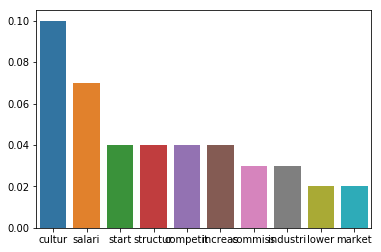

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(imp_words[0], imp_word_prob[0])
plt.show()

In [55]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [56]:
import math
df_ = pd.DataFrame()
df_["x"] = imp_words[0]
df_["top"] = imp_word_prob[0]

source = ColumnDataSource(dict(
    x=df_['x'],
    top=df_['top']
))

# p = figure(plot_width=1000, plot_height=700,
#                      title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
#                      x_axis_type=None, y_axis_type=None, min_border=1)

p = figure(x_range=imp_words[0], plot_height=250, plot_width=400, title="Top Ten Words",
           toolbar_location=None, tools="hover")

p.vbar(x='x', top= 'top', width=0.8, source=source)#'msize', )

# hover tools
hover = p.select(dict(type=HoverTool))
hover.tooltips = { "Prob": "@top"}
p.xaxis.major_label_orientation = math.pi/2
# plot_lda.legend.location = "top_left"

show(p)

In [57]:
from bokeh.layouts import gridplot

fs = []
for i in range(num_topics):
    df_ = pd.DataFrame()
    df_["x"] = imp_words[i]
    df_["top"] = imp_word_prob[i]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i}",
           toolbar_location=None, tools="hover")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)
    
show(gridplot(fs, ncols=2))
